<a href="https://colab.research.google.com/github/Sanjay05-coder/K-Means-Clusteting-iris-dataset/blob/main/K_Means_Clusteting_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler#Why we use standard scaler is because when algo has distance calculation, you need standardize the date , you can refer to KNN notes.
import seaborn as sns

In [3]:
# load iris dataset
iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

# How to Implementing K-Means Clustering ?

* Choose the number of clusters k
* Select k random points from the data as centroids
* Assign all the points to the closest cluster centroid
* Recompute the centroids of newly formed clusters
* Repeat steps 3 and 4 (stop when the all centroids do not move)


In [4]:
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#define the features

X=iris.data

In [6]:
#when using the algo that is using distance hv to scale
scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)

In [7]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [9]:
# convert the scaled data into a dataframe

df_scaled=pd.DataFrame(X_scaled,columns=iris.feature_names)

In [10]:
df_scaled # scaled data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


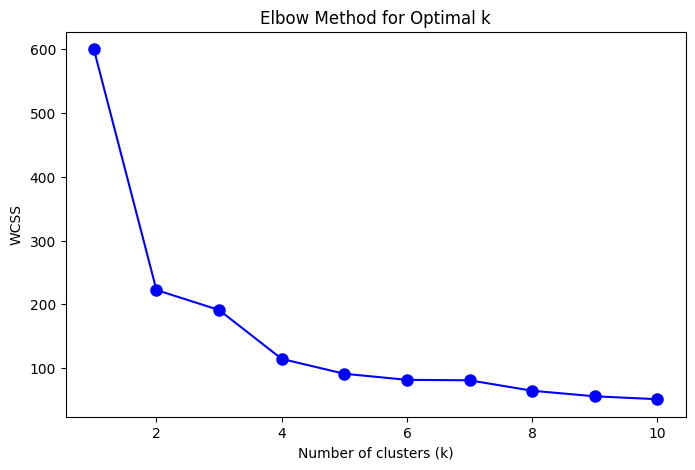

In [11]:
#WCSS-> Within Cluster Sum of Squares(WCSS)

#WCSS --> Measures how tightly the datapoints within a cluster is  grouped
# It is calculated as the sum of squared distances between each data point and its closest cluster centroid.

# Lower WCSS means the points in a cluster are closer to the centroid, indicating tighter and more well-defined clusters.
# Higher WCSS means the points are more spread out, indicating less compact clusters.

wcss=[] # want to store the wcss values for diffrent k values
k_value=range(1,11) # is a sequence of num frm 1 to 10,representing the potential number of cluste to evaluate

for k in k_value: # looping through the val 1 to 11 to find the best point and represent through the elbow curve and find out
  kmeans = KMeans(n_clusters=k,random_state=42)#KMeans model is created with n_clusters set to k and random_state set to 42 for reproducibility.
  kmeans.fit(X_scaled)#The model is trained using the scaled data
  wcss.append(kmeans.inertia_)#The inertia (WCSS) of the model is calculated and added to the wcss list.

#Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_value,wcss,"bo-",markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()



# the K optimal value will b 3 will have best variation

# at point 2 is high variation
# after 3 it goes to a drastic drop so where it starts is the elbow is out k


#implementing K-Means

In [12]:
k=3
kmeans=KMeans(n_clusters=k,random_state=42)
kmeans.fit(X_scaled)

#get the cluster labels and centroids
label=kmeans.labels_
centroids=kmeans.cluster_centers_

# Apply PCS to reduce to 2 Dimension - just for reference code when using large dataset
# PCA it reduces the number of features by creating new components that keep most of the important information from the dataset. used like for large dataset

In [21]:

#From sklearn.decomposition import PCA
#pca=PCA(n_components=2)
#X_pca=pca.fit_transform(X_scaled)

#Plot the cluster

In [22]:
#plt.figure(figsize=(8,6))
#for i in range(k):
#  plt.scatter(X_pca[label==i,0],X_pca[label==i,1],label=f'Cluster{i+1}')
#  plt.scatter(centroids[:,0],centroids[:,1],s=200,c='red',marker='X',label='Centroids')
#  plt.legend()
#  plt.title('K-Means Clustering on iris dataset')
#  plt.xlabel('PC1')
# plt.ylabel('PC2')
#  plt.show()

  # this is just the code for reference if wanna draw using PCA

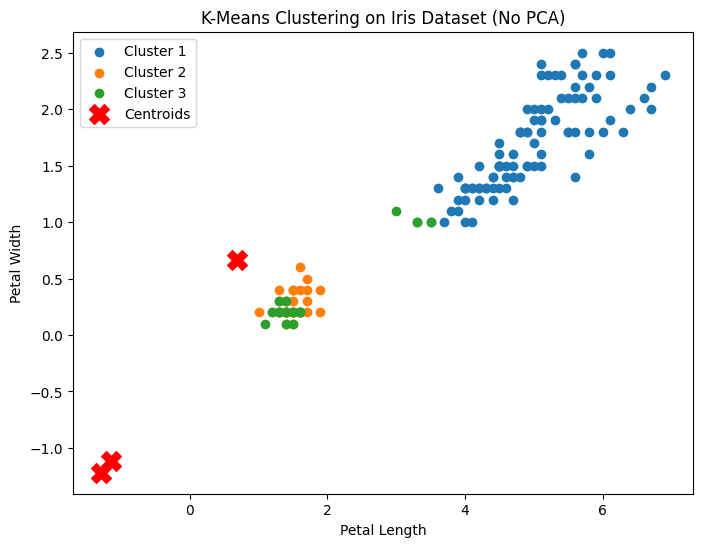

In [17]:
# ploting without pca as this is a small dataset
plt.figure(figsize=(8,6))
for i in range(k):
    plt.scatter(X[label==i, 2], X[label==i, 3], label=f'Cluster {i+1}')

# Plot centroids using the same feature pair
plt.scatter(centroids[:, 2], centroids[:, 3], s=200, c='red', marker='X', label='Centroids')

plt.legend()
plt.title('K-Means Clustering on Iris Dataset (No PCA)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()